In [1]:
from datetime import datetime
import backtrader as bt #importing necessary packages to backtest our strategy

<IPython.core.display.Javascript object>


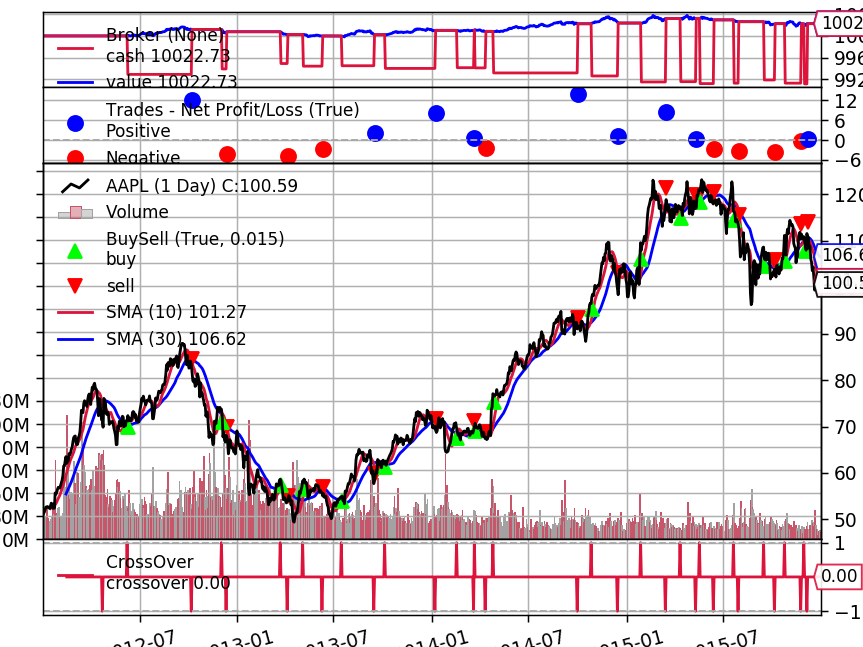

[[<Figure size 640x480 with 5 Axes>]]

In [2]:
class SmaCross(bt.Strategy): # first we define our strategy by creating a class
    
    params = dict(pfast=10,pslow=30) # we define our parameters based on which we will go long
    
    def __init__(self):
        sma1=bt.ind.SMA(period=self.p.pfast) #we calculate the moving averages and the syntax is somewhat similar to
        sma2=bt.ind.SMA(period=self.p.pslow) # that of a pandas series
        self.crossover = bt.ind.CrossOver(sma1,sma2) # crossover is a situation we define that will trigger our trade
    def next(self):
        if not self.position: # if there is no outstanding position
            if self.crossover > 0: # and the difference of two defined parameter is positive
                self.buy() # we go long on the stock
        elif self.crossover < 0: # in case of a negative difference
            self.close() # we dont do anything 
cerebro = bt.Cerebro() # this fuction helps to run our strategy. Its the backbone of our strategy
data = bt.feeds.YahooFinanceData(dataname='AAPL',fromdate=datetime(2012,1,1), todate=datetime(2015,12,31)) # we pull data for
cerebro.adddata(data) # our strategy and add it to Cerebro
cerebro.addstrategy(SmaCross) # we then add our created strategy to cerebro
cerebro.run() # we run the strategy
cerebro.plot() # this line creates a plot. Blue dots indicate a profitable trade and red ones indicate a loss

In [3]:
import backtrader.analyzers as btanalyzers # importing a module to analyze our strategy by calculating sharpe ratio
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')

thestrats = cerebro.run() # the same strategy is assigned to a variable 
thestrat = thestrats[0]

print('Sharpe Ratio:', thestrat.analyzers.mysharpe.get_analysis()) # syntax to get analysis of strategy run using cerebro

Sharpe Ratio: OrderedDict([('sharperatio', -20.044378454924935)])
